In [1]:
import requests
import statsmodels.formula.api as smf    # for OLS regression
import pylab as pl
import pandas as pd
import numpy as np
import json
import urllib 
import scipy.stats
import os
import sys
%pylab inline

#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
import fiona
#import shapely to handle geographical shapes
import shapely
import urllib.request
import gzip
from shapely.geometry import Point
from geopandas.tools import sjoin


Populating the interactive namespace from numpy and matplotlib


# property info(unfinished)

# for hire vihecle pickup info

#concat files

In [ ]:
import glob
path = r'Data/FHV'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   =  pd.concat(df_from_each_file, ignore_index=True)

In [ ]:
len(concatenated_df)

In [ ]:
concatenated_df.shape

In [ ]:
concatenated_df.dropna(axis=0, inplace=True)
concatenated_df.shape

In [ ]:
concatenated_df.to_csv('Data/FHV/FHV2016_concat.csv')

In [ ]:
concatenated_df.head()

#init from concat file

In [ ]:
FHV = pd.read_csv('Data/FHV/FHV2016_concat.csv')

In [ ]:
FHV.shape

In [ ]:
FHV.reset_index(inplace=True)
FHV.rename(columns={'index':'dispatching_number'}, inplace=True)


In [ ]:
FHV.drop([u'dispatching_number', u'Unnamed: 0', u'Dispatching_base_num'], axis = 1, inplace = True)

In [ ]:
FHV.to_csv('Data/FHV/FHV2016.csv')

# project taxi zone to tract

In [6]:
#census = gpd.GeoDataFrame.from_file('Data/cb_2016_36_tract_500k/cb_2016_36_tract_500k.shp')
#census.head()

NYCcensus = gpd.GeoDataFrame.from_file('Data/nyc tracts/nyu_2451_34513.shp')
NYCcensus.head()

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,36,005,000100,36005000100,1,Census Tract 1,G5020,S,1579361,1125765,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,..."
1,36,005,000200,36005000200,2,Census Tract 2,G5020,S,455322,926899,+40.8045733,-073.8568585,"POLYGON ((1021558.246854801 236060.6961875496,..."
2,36,005,000400,36005000400,4,Census Tract 4,G5020,S,912392,602945,+40.8089152,-073.8504884,"POLYGON ((1023113.722613043 236337.8490007798,..."
3,36,005,001600,36005001600,16,Census Tract 16,G5020,S,485079,0,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,..."
4,36,005,001900,36005001900,19,Census Tract 19,G5020,S,1643654,1139660,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,..."


In [7]:
NYCcensus.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 41.03333333333333,
 'lat_2': 40.66666666666666,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000.0000000001,
 'y_0': 0}

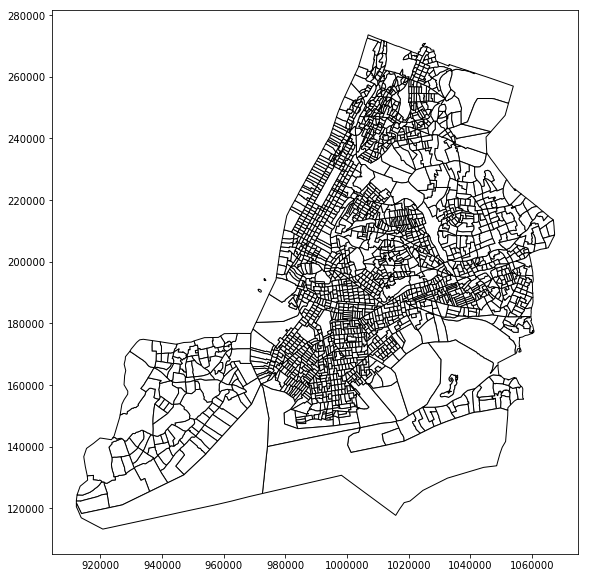

In [8]:
NYCcensus.plot(facecolor='w',edgecolor='k')

In [2]:
taxizone = gpd.GeoDataFrame.from_file('Data/taxi zone/taxi_zones.shp')
taxizone.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [3]:
taxizone.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

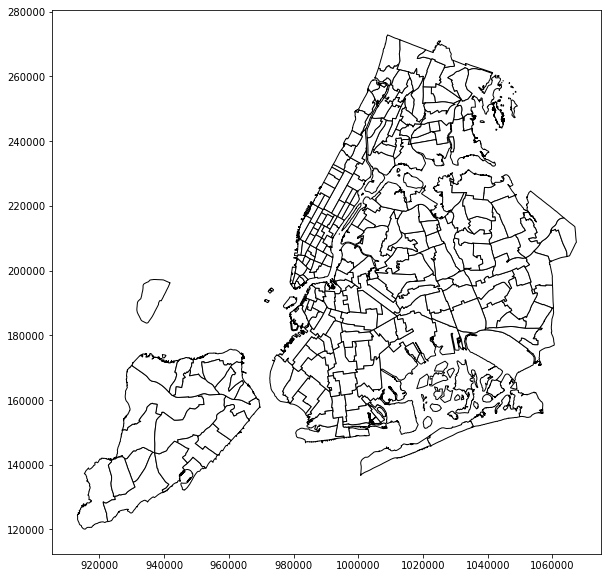

In [9]:
taxizone.plot(figsize(10,10),facecolor='w',edgecolor='k')

In [11]:
NYCcensus.crs = taxizone.crs

In [12]:
zonecombined = gpd.sjoin(NYCcensus,taxizone,how="left",op="intersects")
zonecombined.fillna(0, inplace = True)
zonecombined

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,36,005,000100,36005000100,1,Census Tract 1,G5020,S,1579361,1125765,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",198.0,199.0,0.077809,0.000289,Rikers Island,199.0,Bronx
0,36,005,000100,36005000100,1,Census Tract 1,G5020,S,1579361,1125765,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",167.0,168.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx
1,36,005,000200,36005000200,2,Census Tract 2,G5020,S,455322,926899,+40.8045733,-073.8568585,"POLYGON ((1021558.246854801 236060.6961875496,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx
2,36,005,000400,36005000400,4,Census Tract 4,G5020,S,912392,602945,+40.8089152,-073.8504884,"POLYGON ((1023113.722613043 236337.8490007798,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx
3,36,005,001600,36005001600,16,Census Tract 16,G5020,S,485079,0,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx
3,36,005,001600,36005001600,16,Census Tract 16,G5020,S,485079,0,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",249.0,250.0,0.079626,0.000241,Westchester Village/Unionport,250.0,Bronx
4,36,005,001900,36005001900,19,Census Tract 19,G5020,S,1643654,1139660,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",167.0,168.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx
4,36,005,001900,36005001900,19,Census Tract 19,G5020,S,1643654,1139660,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",125.0,126.0,0.129949,0.000703,Hunts Point,126.0,Bronx
5,36,005,002000,36005002000,20,Census Tract 20,G5020,S,395567,0,+40.8175801,-073.8660962,"POLYGON ((1020092.747630042 238184.3884127718,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx
6,36,005,002300,36005002300,23,Census Tract 23,G5020,S,104522,0,+40.8090843,-073.9258461,"POLYGON ((1003958.187054441 234353.1285414048,...",167.0,168.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx


In [13]:
zonecombined = zonecombined[zonecombined.index_right>0]
zonecombined

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,36,005,000100,36005000100,1,Census Tract 1,G5020,S,1579361,1125765,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",198.0,199.0,0.077809,0.000289,Rikers Island,199.0,Bronx
0,36,005,000100,36005000100,1,Census Tract 1,G5020,S,1579361,1125765,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",167.0,168.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx
1,36,005,000200,36005000200,2,Census Tract 2,G5020,S,455322,926899,+40.8045733,-073.8568585,"POLYGON ((1021558.246854801 236060.6961875496,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx
2,36,005,000400,36005000400,4,Census Tract 4,G5020,S,912392,602945,+40.8089152,-073.8504884,"POLYGON ((1023113.722613043 236337.8490007798,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx
3,36,005,001600,36005001600,16,Census Tract 16,G5020,S,485079,0,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx
3,36,005,001600,36005001600,16,Census Tract 16,G5020,S,485079,0,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",249.0,250.0,0.079626,0.000241,Westchester Village/Unionport,250.0,Bronx
4,36,005,001900,36005001900,19,Census Tract 19,G5020,S,1643654,1139660,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",167.0,168.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx
4,36,005,001900,36005001900,19,Census Tract 19,G5020,S,1643654,1139660,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",125.0,126.0,0.129949,0.000703,Hunts Point,126.0,Bronx
5,36,005,002000,36005002000,20,Census Tract 20,G5020,S,395567,0,+40.8175801,-073.8660962,"POLYGON ((1020092.747630042 238184.3884127718,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx
6,36,005,002300,36005002300,23,Census Tract 23,G5020,S,104522,0,+40.8090843,-073.9258461,"POLYGON ((1003958.187054441 234353.1285414048,...",167.0,168.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx


In [14]:
def get_size_of_intersection(base, taxi):
    return base['geometry'].intersection(taxi['geometry'].iloc[int(base['index_right'])]).area



In [15]:
zonecombined['intersection_size'] = zonecombined.apply(lambda row : 
                                       get_size_of_intersection(row, taxizone), axis=1)

/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
zonecombined

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,...,intptlon,geometry,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,intersection_size
0,36,005,000100,36005000100,1,Census Tract 1,G5020,S,1579361,1125765,...,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",198.0,199.0,0.077809,0.000289,Rikers Island,199.0,Bronx,1.777861e+07
0,36,005,000100,36005000100,1,Census Tract 1,G5020,S,1579361,1125765,...,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",167.0,168.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,9.809815e+03
1,36,005,000200,36005000200,2,Census Tract 2,G5020,S,455322,926899,...,-073.8568585,"POLYGON ((1021558.246854801 236060.6961875496,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,5.033529e+06
2,36,005,000400,36005000400,4,Census Tract 4,G5020,S,912392,602945,...,-073.8504884,"POLYGON ((1023113.722613043 236337.8490007798,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,8.572121e+06
3,36,005,001600,36005001600,16,Census Tract 16,G5020,S,485079,0,...,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,5.221228e+06
3,36,005,001600,36005001600,16,Census Tract 16,G5020,S,485079,0,...,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",249.0,250.0,0.079626,0.000241,Westchester Village/Unionport,250.0,Bronx,1.759700e+01
4,36,005,001900,36005001900,19,Census Tract 19,G5020,S,1643654,1139660,...,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",167.0,168.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,1.760233e+07
4,36,005,001900,36005001900,19,Census Tract 19,G5020,S,1643654,1139660,...,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",125.0,126.0,0.129949,0.000703,Hunts Point,126.0,Bronx,4.519082e+04
5,36,005,002000,36005002000,20,Census Tract 20,G5020,S,395567,0,...,-073.8660962,"POLYGON ((1020092.747630042 238184.3884127718,...",212.0,213.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,4.257806e+06
6,36,005,002300,36005002300,23,Census Tract 23,G5020,S,104522,0,...,-073.9258461,"POLYGON ((1003958.187054441 234353.1285414048,...",167.0,168.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,1.125053e+06


In [17]:
zonecombined.columns

Index(['statefp', 'countyfp', 'tractce', 'geoid', 'name', 'namelsad', 'mtfcc',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry',
       'index_right', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'intersection_size'],
      dtype='object')

In [19]:
zonecombined.drop([u'statefp', u'countyfp', u'name', u'namelsad', u'mtfcc',
       u'funcstat', u'aland', u'awater', u'OBJECTID'], axis = 1, inplace = True)

/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
zonecombined.head()

,tractce,geoid,intptlat,intptlon,geometry,index_right,Shape_Leng,Shape_Area,zone,LocationID,borough,intersection_size
0,000100,36005000100,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",198.0,0.077809,0.000289,Rikers Island,199.0,Bronx,1.777861e+07
0,000100,36005000100,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",167.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,9.809815e+03
1,000200,36005000200,+40.8045733,-073.8568585,"POLYGON ((1021558.246854801 236060.6961875496,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,5.033529e+06
2,000400,36005000400,+40.8089152,-073.8504884,"POLYGON ((1023113.722613043 236337.8490007798,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,8.572121e+06
3,001600,36005001600,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,5.221228e+06


In [21]:
taxizone['area'] = taxizone.geometry.area
taxizone

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,area
index_right,,,,,,,,
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",7.903953e+07
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",1.439095e+08
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",3.168508e+07
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",8.023733e+06
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",5.041488e+07
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",4.093479e+07
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",3.934104e+07
7,8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276373357 221686.4661663175,...",2.682802e+06
8,9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993348822 216615.9250395149,...",3.416422e+07


In [22]:
zonecombined.reset_index(inplace=True)

In [25]:
zonecombined

,zone_percentage,tractce,geoid,intptlat,intptlon,geometry,index_right,Shape_Leng,Shape_Area,zone,LocationID,borough,intersection_size
0,0,000100,36005000100,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",198.0,0.077809,0.000289,Rikers Island,199.0,Bronx,1.777861e+07
1,0,000100,36005000100,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",167.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,9.809815e+03
2,1,000200,36005000200,+40.8045733,-073.8568585,"POLYGON ((1021558.246854801 236060.6961875496,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,5.033529e+06
3,2,000400,36005000400,+40.8089152,-073.8504884,"POLYGON ((1023113.722613043 236337.8490007798,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,8.572121e+06
4,3,001600,36005001600,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,5.221228e+06
5,3,001600,36005001600,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",249.0,0.079626,0.000241,Westchester Village/Unionport,250.0,Bronx,1.759700e+01
6,4,001900,36005001900,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",167.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,1.760233e+07
7,4,001900,36005001900,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",125.0,0.129949,0.000703,Hunts Point,126.0,Bronx,4.519082e+04
8,5,002000,36005002000,+40.8175801,-073.8660962,"POLYGON ((1020092.747630042 238184.3884127718,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,4.257806e+06
9,6,002300,36005002300,+40.8090843,-073.9258461,"POLYGON ((1003958.187054441 234353.1285414048,...",167.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,1.125053e+06


In [26]:
zonecombined['taxizone_area']=0
for k in range(len(zonecombined)):
        zonecombined['taxizone_area'][k] = taxizone['area'][int(zonecombined['LocationID'][k]-1)]



/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cihe/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

In [27]:
zonecombined.rename(columns={"index": "zone_percentage"},inplace=True)

/Users/cihe/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [28]:
zonecombined['zone_percentage']=zonecombined['intersection_size']/zonecombined['taxizone_area']

/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
zonecombined

,zone_percentage,tractce,geoid,intptlat,intptlon,geometry,index_right,Shape_Leng,Shape_Area,zone,LocationID,borough,intersection_size,taxizone_area
0,9.792794e-01,000100,36005000100,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",198.0,0.077809,0.000289,Rikers Island,199.0,Bronx,1.777861e+07,18154787
1,2.340927e-04,000100,36005000100,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",167.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,9.809815e+03,41905684
2,8.445198e-02,000200,36005000200,+40.8045733,-073.8568585,"POLYGON ((1021558.246854801 236060.6961875496,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,5.033529e+06,59602261
3,1.438221e-01,000400,36005000400,+40.8089152,-073.8504884,"POLYGON ((1023113.722613043 236337.8490007798,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,8.572121e+06,59602261
4,8.760117e-02,001600,36005001600,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,5.221228e+06,59602261
5,7.347124e-07,001600,36005001600,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",249.0,0.079626,0.000241,Westchester Village/Unionport,250.0,Bronx,1.759700e+01,23950873
6,4.200465e-01,001900,36005001900,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",167.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,1.760233e+07,41905684
7,9.084534e-04,001900,36005001900,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",125.0,0.129949,0.000703,Hunts Point,126.0,Bronx,4.519082e+04,49744786
8,7.143699e-02,002000,36005002000,+40.8175801,-073.8660962,"POLYGON ((1020092.747630042 238184.3884127718,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,4.257806e+06,59602261
9,2.684727e-02,002300,36005002300,+40.8090843,-073.9258461,"POLYGON ((1003958.187054441 234353.1285414048,...",167.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,1.125053e+06,41905684


In [30]:
zonecombined.to_csv('Data/combinezonefinal.csv', sep=',', index=True)

# get each tracts trip quantities

#format cleaning

In [ ]:
FHV = pd.read_csv('Data/FHV/FHV2016.csv')

In [ ]:
FHV.head()

In [ ]:
FHV['Pickup_date'] = pd.to_datetime(FHV['Pickup_date'])

In [ ]:
FHV.Pickup_date[6]

In [ ]:
FHV.drop([u'Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
FHV.to_csv('Data/FHV/FHV2016cleaned.csv')

#use cleaned data

In [3]:
FHV = pd.read_csv('Data/FHV/FHV2016cleaned.csv')
FHV.head()

,Unnamed: 0,Pickup_date,locationID
0,0,2016-01-01 05:57:00,129.0
1,1,2016-01-01 05:59:00,129.0
2,2,2016-01-01 05:59:00,265.0
3,3,2016-01-01 06:01:00,173.0
4,4,2016-01-01 06:02:00,173.0


In [6]:
FHV_quan = FHV.groupby(['locationID']).count()

In [ ]:
FHV_quan.reset_index(inplace=True)
FHV_quan.rename(columns={'Unnamed: 0':'pickup'}, inplace=True)


In [ ]:
FHV_quan.drop([u'Pickup_date'], axis = 1, inplace = True)


In [11]:
FHV_quan.drop([u'index'], axis = 1, inplace = True)
FHV_quan.head()

,locationID,pickup
0,1.0,9335
1,2.0,823
2,3.0,100222
3,4.0,503145
4,5.0,5569


In [12]:
FHV_quan.shape

(263, 2)

In [17]:
FHV_quan.rename(columns={'locationID':'LocationID'}, inplace=True)
FHV_quan.to_csv('Data/FHV/FHV_quan.csv')

#find FHV picks for each tracts

In [31]:
intracts = pd.read_csv('Data/combinezonefinal.csv')
intracts.head()

,Unnamed: 0,zone_percentage,tractce,geoid,intptlat,intptlon,geometry,index_right,Shape_Leng,Shape_Area,zone,LocationID,borough,intersection_size,taxizone_area
0,0,0.979279,100,36005000100,40.793492,-73.883532,"POLYGON ((1012569.251133646 228983.7017812101,...",198.0,0.077809,0.000289,Rikers Island,199.0,Bronx,1.777861e+07,18154787
1,1,0.000234,100,36005000100,40.793492,-73.883532,"POLYGON ((1012569.251133646 228983.7017812101,...",167.0,0.114517,0.000547,Mott Haven/Port Morris,168.0,Bronx,9.809815e+03,41905684
2,2,0.084452,200,36005000200,40.804573,-73.856859,"POLYGON ((1021558.246854801 236060.6961875496,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,5.033529e+06,59602261
3,3,0.143822,400,36005000400,40.808915,-73.850488,"POLYGON ((1023113.722613043 236337.8490007798,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,8.572121e+06,59602261
4,4,0.087601,1600,36005001600,40.818848,-73.858076,"POLYGON ((1022690.147961642 238650.3462913418,...",212.0,0.159959,0.000904,Soundview/Castle Hill,213.0,Bronx,5.221228e+06,59602261


In [32]:
intracts.shape

(4991, 15)

In [33]:
FHV_quan = pd.read_csv('Data/FHV/FHV_quan.csv')

In [34]:
FHV_quan.head()

,Unnamed: 0,LocationID,pickup
0,0,1.0,9335
1,1,2.0,823
2,2,3.0,100222
3,3,4.0,503145
4,4,5.0,5569


In [35]:
FHV_quan.shape

(263, 3)

In [36]:
intractsmerge = pd.merge(intracts, FHV_quan, how='inner', on='LocationID')

In [37]:
intractsmerge.rename(columns={'Unnamed: 0_x':'pickups_intract'}, inplace=True)

In [38]:
intractsmerge['pickups_intract'] = intractsmerge.zone_percentage*intractsmerge.pickup

In [41]:
heat = intractsmerge.groupby(['geoid']).sum()

In [52]:
heat.head()

,geoid,pickups_intract,intptlat,intptlon,index_right,Shape_Leng,Shape_Area
0,36005000100,138.936184,81.586984,-147.767064,365.0,0.192326,0.000836
1,36005000200,7891.614963,40.804573,-73.856859,212.0,0.159959,0.000904
2,36005000400,13439.453960,40.808915,-73.850488,212.0,0.159959,0.000904
3,36005001600,8185.934152,81.637696,-147.716153,461.0,0.239585,0.001145
4,36005001900,64852.578448,81.601998,-147.818746,292.0,0.244466,0.001250


In [44]:
heat.reset_index(inplace=True)
heat.drop([ u'zone_percentage', u'tractce',
       u'LocationID', u'intersection_size', u'taxizone_area', u'Unnamed: 0_y',
       u'pickup',], axis = 1, inplace = True)


In [45]:
heat.drop([u'index',], axis = 1, inplace = True)
heat

,geoid,pickups_intract,intptlat,intptlon,index_right,Shape_Leng,Shape_Area
0,36005000100,138.936184,81.586984,-147.767064,365.0,0.192326,0.000836
1,36005000200,7891.614963,40.804573,-73.856859,212.0,0.159959,0.000904
2,36005000400,13439.453960,40.808915,-73.850488,212.0,0.159959,0.000904
3,36005001600,8185.934152,81.637696,-147.716153,461.0,0.239585,0.001145
4,36005001900,64852.578448,81.601998,-147.818746,292.0,0.244466,0.001250
5,36005002000,6675.429602,40.817580,-73.866096,212.0,0.159959,0.000904
6,36005002300,4141.540946,40.809084,-73.925846,167.0,0.114517,0.000547
7,36005002400,12023.755886,122.447260,-221.613337,548.0,0.357037,0.001769
8,36005002500,5056.711875,40.807003,-73.920878,167.0,0.114517,0.000547
9,36005002701,3294.286106,40.805051,-73.916329,167.0,0.114517,0.000547


In [53]:
#plot heatmap on census

In [46]:
NYCcensus = gpd.GeoDataFrame.from_file('Data/nyc tracts/nyu_2451_34513.shp')
NYCcensus.head()

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,36,005,000100,36005000100,1,Census Tract 1,G5020,S,1579361,1125765,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,..."
1,36,005,000200,36005000200,2,Census Tract 2,G5020,S,455322,926899,+40.8045733,-073.8568585,"POLYGON ((1021558.246854801 236060.6961875496,..."
2,36,005,000400,36005000400,4,Census Tract 4,G5020,S,912392,602945,+40.8089152,-073.8504884,"POLYGON ((1023113.722613043 236337.8490007798,..."
3,36,005,001600,36005001600,16,Census Tract 16,G5020,S,485079,0,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,..."
4,36,005,001900,36005001900,19,Census Tract 19,G5020,S,1643654,1139660,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,..."


In [47]:
NYCcensus['geoid'] = NYCcensus['geoid'].astype(int)

In [49]:
NYCcensusmerge = gpd.GeoDataFrame.merge(NYCcensus, heat, how='inner', on='geoid')

In [50]:
NYCcensusmerge

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,intptlat_x,intptlon_x,geometry,pickups_intract,intptlat_y,intptlon_y,index_right,Shape_Leng,Shape_Area
0,36,005,000100,36005000100,1,Census Tract 1,G5020,S,1579361,1125765,+40.7934921,-073.8835318,"POLYGON ((1012569.251133646 228983.7017812101,...",138.936184,81.586984,-147.767064,365.0,0.192326,0.000836
1,36,005,000200,36005000200,2,Census Tract 2,G5020,S,455322,926899,+40.8045733,-073.8568585,"POLYGON ((1021558.246854801 236060.6961875496,...",7891.614963,40.804573,-73.856859,212.0,0.159959,0.000904
2,36,005,000400,36005000400,4,Census Tract 4,G5020,S,912392,602945,+40.8089152,-073.8504884,"POLYGON ((1023113.722613043 236337.8490007798,...",13439.453960,40.808915,-73.850488,212.0,0.159959,0.000904
3,36,005,001600,36005001600,16,Census Tract 16,G5020,S,485079,0,+40.8188478,-073.8580764,"POLYGON ((1022690.147961642 238650.3462913418,...",8185.934152,81.637696,-147.716153,461.0,0.239585,0.001145
4,36,005,001900,36005001900,19,Census Tract 19,G5020,S,1643654,1139660,+40.8009990,-073.9093729,"POLYGON ((1003183.625868493 233654.4443848743,...",64852.578448,81.601998,-147.818746,292.0,0.244466,0.001250
5,36,005,002000,36005002000,20,Census Tract 20,G5020,S,395567,0,+40.8175801,-073.8660962,"POLYGON ((1020092.747630042 238184.3884127718,...",6675.429602,40.817580,-73.866096,212.0,0.159959,0.000904
6,36,005,002300,36005002300,23,Census Tract 23,G5020,S,104522,0,+40.8090843,-073.9258461,"POLYGON ((1003958.187054441 234353.1285414048,...",4141.540946,40.809084,-73.925846,167.0,0.114517,0.000547
7,36,005,002400,36005002400,24,Census Tract 24,G5020,S,675614,265837,+40.8157533,-073.8711124,"POLYGON ((1017313.43520778 237489.657019409, 1...",12023.755886,122.447260,-221.613337,548.0,0.357037,0.001769
8,36,005,002500,36005002500,25,Census Tract 25,G5020,S,127619,0,+40.8070029,-073.9208781,"POLYGON ((1005334.385789403 233592.8246412546,...",5056.711875,40.807003,-73.920878,167.0,0.114517,0.000547
9,36,005,002701,36005002701,27.01,Census Tract 27.01,G5020,S,83140,0,+40.8050514,-073.9163293,"POLYGON ((1006724.510900186 232536.0428839767,...",3294.286106,40.805051,-73.916329,167.0,0.114517,0.000547


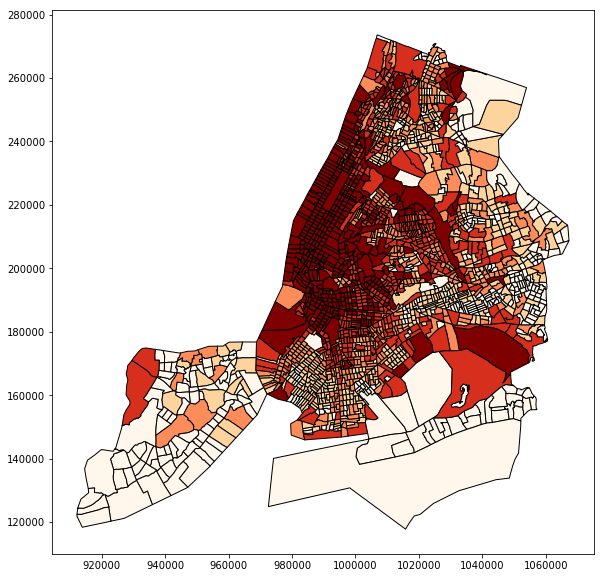

In [51]:
NYCcensusmerge.plot(column='pickups_intract',cmap='OrRd', scheme='quantiles',facecolor='w',edgecolor='k')

In [75]:
import choroplethNYC as cp

# find latlon from address

In [ ]:
import urllib
import json

googleGeocodeUrl = 'http://maps.googleapis.com/maps/api/geocode/json?'

def get_coordinates(query, from_sensor=False):
    query = query.encode('utf-8')
    params = "address={}".format(
            query,
#        'sensor': "true" if from_sensor else "false"
        )
    url = "{googleGeocodeUrl}{params}".format(googleGeocodeUrl=googleGeocodeUrl, params=params)
    response = requests.get(url)
    if response.json()['results']:
        location = response.json()['results'][0]['geometry']['location']
        latitude, longitude = location['lat'], location['lng']
#        print (query, latitude, longitude)
    else:
        latitude, longitude = None, None
        print (query, "<no results>")
    return latitude, longitude

In [ ]:
a = '2031 spring cedar ln, houston'
get_coordinates(a)[0]


In [ ]:
newbuildings = pd.read_excel("Data/brooklynnewbuildings.xlsx")

In [ ]:
len(newbuildings)

In [ ]:
for i in newbuildings.index:
    newbuildings.loc[i,'lat'] = get_coordinates(newbuildings.loc[i,'full_address'])[0]
    newbuildings.loc[i,'lon'] = get_coordinates(newbuildings.loc[i,'full_address'])[1]

In [ ]:
newbuildings.to_csv('newbuildingsloc.csv')